<a href="https://colab.research.google.com/github/Hamid-Mofidi/PINNs_on_Multiple_timescale_dynamics/blob/main/PINNs_PNP/Exact_sol_Reaction_Diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install sympy numpy matplotlib

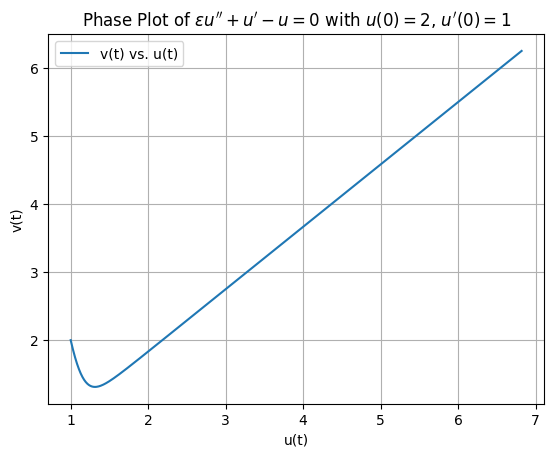

In [14]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols
t, epsilon = sp.symbols('t epsilon')
C1, C2 = sp.symbols('C1 C2')
sqrt_term = sp.sqrt(1 + 4*epsilon)

# Roots of the characteristic equation
r1 = (-1 + sqrt_term) / (2*epsilon)
r2 = (-1 - sqrt_term) / (2*epsilon)

# General solution
u = C1 * sp.exp(r1 * t) + C2 * sp.exp(r2 * t)

# Derivative of the general solution
u_prime = sp.diff(u, t)

# Initial conditions
eq1 = sp.Eq(u.subs(t, 0), 1)
eq2 = sp.Eq(u_prime.subs(t, 0), 2)

# Solve for C1 and C2
solutions = sp.solve((eq1, eq2), (C1, C2))

# Substitute the solutions back into the general solution
u_solution = u.subs(solutions)
v_solution = u_prime.subs(solutions)

# Convert the solutions to numerical functions
u_func = sp.lambdify((t, epsilon), u_solution, modules=['numpy'])
v_func = sp.lambdify((t, epsilon), v_solution, modules=['numpy'])

# Define epsilon value
epsilon_value = 0.1  # Adjust this value as needed

# Generate time values
t_values = np.linspace(0, 2, 400)

# Compute u and v values
u_values = u_func(t_values, epsilon_value)
v_values = v_func(t_values, epsilon_value)

# Plot u vs v
plt.plot(u_values, v_values, label='v(t) vs. u(t)')
plt.title('Phase Plot of $\\varepsilon u\'\' + u\' - u = 0$ with $u(0)=2$, $u\'(0)=1$')
plt.xlabel('u(t)')
plt.ylabel('v(t)')
plt.legend()
plt.grid(True)
plt.show()
